<a href="https://colab.research.google.com/github/Preeyal/Hate-speech-detection/blob/main/Hate_Speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
file_name = "https://raw.githubusercontent.com/NakulLakhotia/Hate-Speech-Detection-in-Social-Media-using-Python/master/HateSpeechData.csv"
df = pd.read_csv(file_name)

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
#
df['labels'] = df['class'].map({0:"Hate Speech", 1: 'Offensive', 2:"No hate or Offensive language"})

In [9]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or Offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive


In [10]:
data = df[['tweet','labels']]

In [11]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or Offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive
24779,"you've gone and broke the wrong heart baby, an...",No hate or Offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive
24781,youu got wild bitches tellin you lies,Offensive


In [12]:
import re
import nltk
# importing stop words


In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
stemmer = nltk.SnowballStemmer('english')

In [15]:
import string

In [16]:
#data Cleaning
def clean_data(text):
  text = str(text).lower()
  text = re.sub('https?://\S+|www\.S+','', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)

  # stop words removal
  text = [word for word in text.split(' ') if word not in stopwords]
  text = " ".join(text)

  #stemmer
  text = [stemmer.stem(word) for word in text.split(" ")]
  text = " ".join(text)
  return text

In [17]:
data['tweet'] = data['tweet'].apply(clean_data)

<ipython-input-17-4e4ff635542f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [18]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or Offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive
3,rt cganderson vivabas look like tranni,Offensive
4,rt shenikarobert shit hear might true might f...,Offensive
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive
24779,youv gone broke wrong heart babi drove redneck...,No hate or Offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive
24781,youu got wild bitch tellin lie,Offensive


In [19]:
x = np.array(data['tweet'])
y = np.array(data['labels'])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [21]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [22]:
x

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197861 stored elements in Compressed Sparse Row format>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [24]:
x_train

<16604x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 132619 stored elements in Compressed Sparse Row format>

In [25]:
#building model
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier(max_depth =3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[2128] <= 0.5\ngini = 0.369\nsamples = 16604\nvalue = [965, 2784, 12855]'),
 Text(0.25, 0.625, 'x[9670] <= 0.5\ngini = 0.514\nsamples = 9681\nvalue = [804, 2780, 6097]'),
 Text(0.125, 0.375, 'x[17788] <= 0.5\ngini = 0.578\nsamples = 7242\nvalue = [750, 2752, 3740]'),
 Text(0.0625, 0.125, 'gini = 0.598\nsamples = 5988\nvalue = [721, 2747, 2520]'),
 Text(0.1875, 0.125, 'gini = 0.053\nsamples = 1254\nvalue = [29, 5, 1220]'),
 Text(0.375, 0.375, 'x[5342] <= 0.5\ngini = 0.065\nsamples = 2439\nvalue = [54, 28, 2357]'),
 Text(0.3125, 0.125, 'gini = 0.063\nsamples = 2436\nvalue = [54, 25, 2357]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.75, 0.625, 'x[7101] <= 0.5\ngini = 0.047\nsamples = 6923\nvalue = [161, 4, 6758]'),
 Text(0.625, 0.375, 'x[7330] <= 0.5\ngini = 0.044\nsamples = 6911\nvalue = [153, 4, 6754]'),
 Text(0.5625, 0.125, 'gini = 0.043\nsamples = 6907\nvalue = [149, 4, 6754]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nvalue

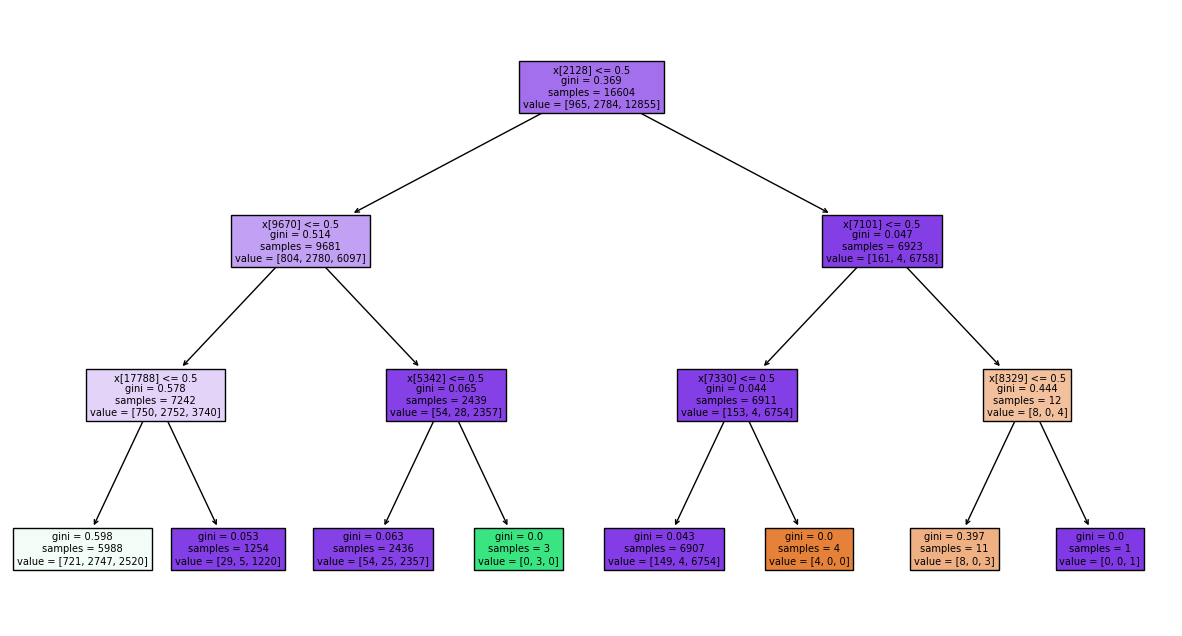

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,8))
tree.plot_tree(dt, filled = True)

In [28]:
y_pred = dt.predict(x_test)

In [32]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 154,   40,  271],
       [  36, 1121,  222],
       [ 229,  218, 5888]])

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

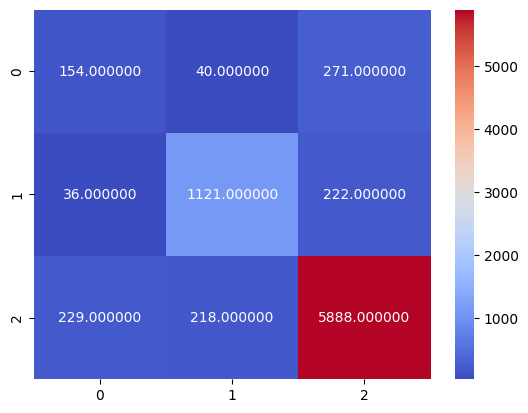

In [34]:
sns.heatmap(cm, annot = True, fmt ='f', cmap = 'coolwarm')

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.87577943513877

In [36]:
sample = "Lets unite and kill all the people who are protesting against the government"
sample = clean_data(sample)

In [37]:
sample

'let unit kill peopl protest govern'

In [38]:
data1 = cv.transform([sample]).toarray()

In [39]:
dt.predict(data1)

array(['No hate or Offensive language'], dtype=object)